### LIBRARY

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### LOAD DATA

In [109]:
print("\nLoading datasets...")
df_train = pd.read_csv('../dataset/bitcoin_price_Training - Training.csv')
df_test = pd.read_csv('../dataset/bitcoin_price_1week_Test - Test.csv')

# Convert Date column
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

print(df_train.head())
print(df_train.info())


Loading datasets...
        Date     Open     High      Low    Close         Volume  \
0 2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000   
1 2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000   
2 2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000   
3 2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4 2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume   

### EDA

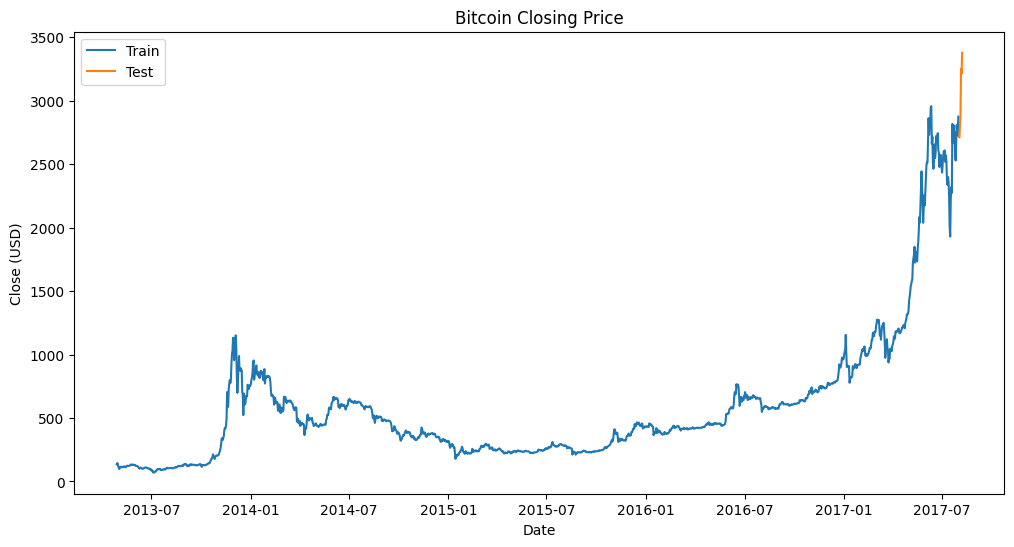

In [110]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_train, x='Date', y='Close', label="Train")
sns.lineplot(data=df_test, x='Date', y='Close', label="Test")
plt.title("Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Close (USD)")
plt.legend()
plt.show()

### PREPROCESSING

In [111]:
for lag in range(1, 4):  # 3 lag features
    df_train[f'Close_Lag{lag}'] = df_train['Close'].shift(lag)
    df_test[f'Close_Lag{lag}'] = df_test['Close'].shift(lag)

# Drop NaN
df_train = df_train.dropna()
df_test = df_test.dropna()

# Features & Target
X = df_train[['Close_Lag1']]
y = df_train['Close']

X_test = df_test[['Close_Lag1']]
y_test = df_test['Close']

In [112]:
# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=False # jangan shuffle untuk time series
)
print("Train size:", X_train.shape, "Validation size:", X_val.shape)

Train size: (1242, 1) Validation size: (311, 1)


In [113]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### MODEL BUILDING

In [114]:
print("\nBuilding and training a Linear Regression model...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("Model training complete.")


Building and training a Linear Regression model...
Model training complete.


### MODEL EVALUATION

Evaluation on Validation Set:
Validation MSE: 1575.83
Validation RMSE: 39.70
Validation MAE: 19.33
Validation R²: 0.9845


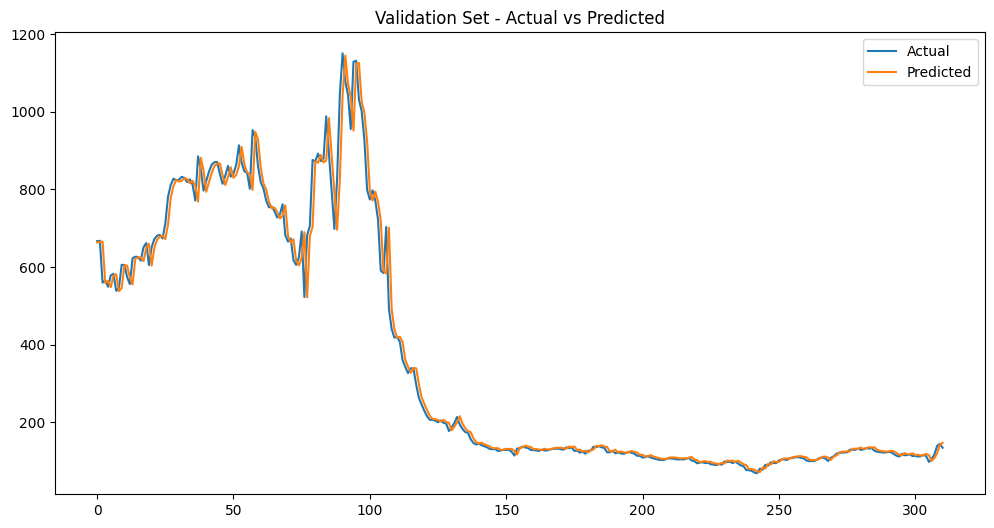

In [115]:
print("Evaluation on Validation Set:")
y_val_pred = model.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse_val:.2f}")
print(f"Validation RMSE: {rmse_val:.2f}")
print(f"Validation MAE: {mae_val:.2f}")
print(f"Validation R²: {r2_val:.4f}")

plt.figure(figsize=(12,6))
plt.plot(y_val.values, label="Actual")
plt.plot(y_val_pred, label="Predicted")
plt.title("Validation Set - Actual vs Predicted")
plt.legend()
plt.show()

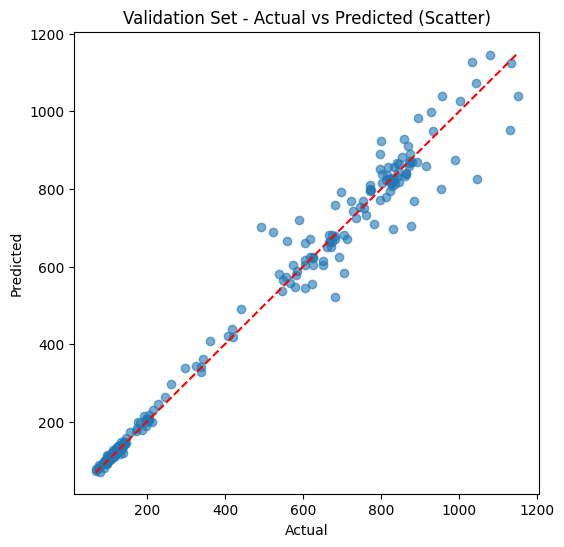

In [116]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Validation Set - Actual vs Predicted (Scatter)")
plt.show()

### MODEL RESULT

Test MSE: 30728.68
Test RMSE: 175.30
Test MAE: 126.51
Test R²: -4.4296


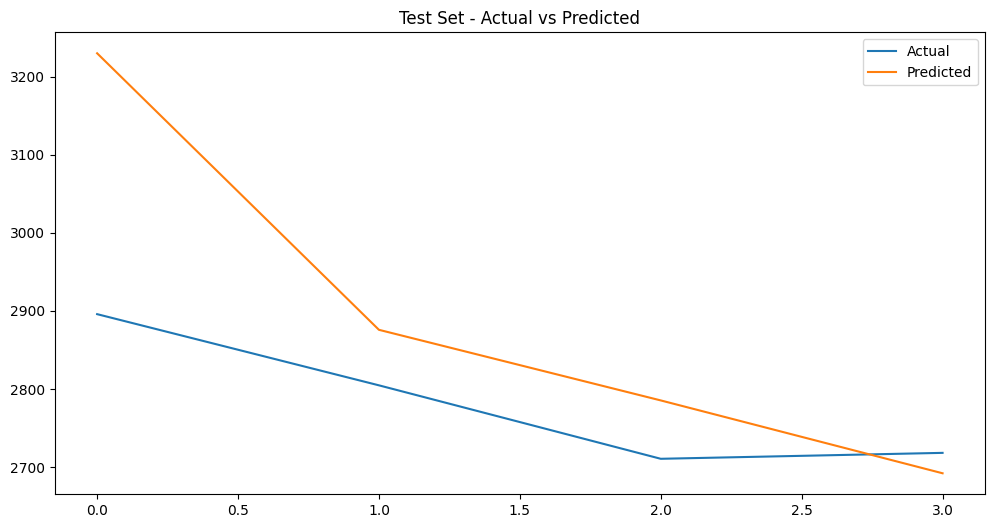

In [117]:
y_test_pred = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test R²: {r2_test:.4f}")

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_test_pred, label="Predicted")
plt.title("Test Set - Actual vs Predicted")
plt.legend()
plt.show()

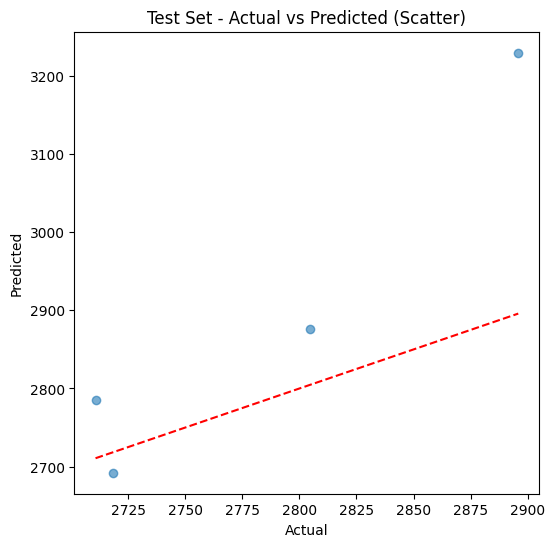

In [118]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Set - Actual vs Predicted (Scatter)")
plt.show()

### NAIVE FORECAST

In [119]:
print("Baseline Model (Naive Forecast):")
y_test_naive = X_test['Close_Lag1'].values  
mse_naive = mean_squared_error(y_test, y_test_naive)
rmse_naive = np.sqrt(mse_naive)
mae_naive = mean_absolute_error(y_test, y_test_naive)
r2_naive = r2_score(y_test, y_test_naive)

print(f"Naive RMSE: {rmse_naive:.2f}")

Baseline Model (Naive Forecast):
Naive RMSE: 190.18


In [120]:
comparison = pd.DataFrame({
    "Model": ["Naive Forecast", "Linear Regression"],
    "MSE": [mse_naive, mse_test],
    "RMSE": [rmse_naive, rmse_test],
    "MAE": [mae_naive, mae_test],
    "R²": [r2_naive, r2_test]
})
print("Model Comparison")
print(comparison)

Model Comparison
               Model           MSE        RMSE         MAE        R²
0     Naive Forecast  36169.579425  190.183016  137.457500 -5.391023
1  Linear Regression  30728.679270  175.295976  126.508434 -4.429637


### CROSS VALIDATION (TIME SERIES)

In [121]:
print("Time Series Cross-Validation")
tscv = TimeSeriesSplit(n_splits=5)
cv_mse = []

for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
    X_tr, X_vl = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_vl = y.iloc[train_idx], y.iloc[val_idx]

    # scale per fold
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_vl_scaled = scaler.transform(X_vl)

    fold_model = LinearRegression()
    fold_model.fit(X_tr_scaled, y_tr)
    y_vl_pred = fold_model.predict(X_vl_scaled)

    fold_mse = mean_squared_error(y_vl, y_vl_pred)
    cv_mse.append(fold_mse)
    print(f"Fold {fold+1} MSE: {fold_mse:.2f}")

print("Average CV MSE:", np.mean(cv_mse))

Time Series Cross-Validation
Fold 1 MSE: 225.34
Fold 2 MSE: 132.21
Fold 3 MSE: 109.82
Fold 4 MSE: 532.49
Fold 5 MSE: 1639.93
Average CV MSE: 527.9559088354769


### PREDICT RESULT

In [122]:
# Predictions (real price outputs)
print("Export Predictions:")
results = pd.DataFrame({
    "Date": df_test['Date'].iloc[len(df_test) - len(y_test):].values,
    "Actual_Close": y_test.values,
    "Predicted_Close": y_test_pred,
    "Naive_Close": y_test_naive
})

print(results.to_string(index=False))


Export Predictions:
      Date  Actual_Close  Predicted_Close  Naive_Close
2017-08-04       2895.89      3229.940586      3252.91
2017-08-03       2804.73      2875.829537      2895.89
2017-08-02       2710.67      2785.412296      2804.73
2017-08-01       2718.26      2692.118685      2710.67


In [123]:
import joblib

In [124]:
joblib.dump(model, 'bitcoin_price_model.pkl')
joblib.dump(scaler, 'bitcoin_price_scaler.pkl')

print("Model and scaler saved to disk.")

Model and scaler saved to disk.
